In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
DataDiabets = pd.read_csv("dSetDiabets.csv")
DataDiabets.rename(columns={
    "Diabetes_012":     "Diabetico",
    "HighBP":     "Iperteso",
    "HighChol":     "Colesterolo",
    "CholCheck":     "ControlloColesterolo",
    "Smoker":     "Fumatore",
    "Stroke":     "Infarto",
    "HeartDiseaseorAttack":     "ProblemiCardiaci",
    "PhysActivity":     "AttivitàFisica",
    "HvyAlcoholConsump":     "ConsumoAlcol",
    "GenHlth":     "SaluteGenerale",
    "MentHlth":     "SaluteMentale",
    "PhysHlth":     "SaluteFisica",
    "DiffWalk":     "DifficolàSportiva",
    },inplace=True)

trainTest, TestSet = train_test_split(DataDiabets)
combine = [trainTest, TestSet]

In [7]:
trainTest.isnull().sum()

Diabetico               0
Iperteso                0
Colesterolo             0
ControlloColesterolo    0
BMI                     0
Fumatore                0
Infarto                 0
ProblemiCardiaci        0
AttivitàFisica          0
Fruits                  0
Veggies                 0
ConsumoAlcol            0
AnyHealthcare           0
NoDocbcCost             0
SaluteGenerale          0
SaluteMentale           0
SaluteFisica            0
DifficolàSportiva       0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
TestSet.isnull().sum()

Diabetico               0
Iperteso                0
Colesterolo             0
ControlloColesterolo    0
BMI                     0
Fumatore                0
Infarto                 0
ProblemiCardiaci        0
AttivitàFisica          0
Fruits                  0
Veggies                 0
ConsumoAlcol            0
AnyHealthcare           0
NoDocbcCost             0
SaluteGenerale          0
SaluteMentale           0
SaluteFisica            0
DifficolàSportiva       0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
print(trainTest.columns.values)
trainTest.head()

['Diabetico' 'Iperteso' 'Colesterolo' 'ControlloColesterolo' 'BMI'
 'Fumatore' 'Infarto' 'ProblemiCardiaci' 'AttivitàFisica' 'Fruits'
 'Veggies' 'ConsumoAlcol' 'AnyHealthcare' 'NoDocbcCost' 'SaluteGenerale'
 'SaluteMentale' 'SaluteFisica' 'DifficolàSportiva' 'Sex' 'Age'
 'Education' 'Income']


,Diabetico,Iperteso,Colesterolo,ControlloColesterolo,BMI,Fumatore,Infarto,ProblemiCardiaci,AttivitàFisica,Fruits,...,AnyHealthcare,NoDocbcCost,SaluteGenerale,SaluteMentale,SaluteFisica,DifficolàSportiva,Sex,Age,Education,Income
61003,0.0,1.0,1.0,1.0,31.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,5.0,7.0
81818,0.0,0.0,0.0,0.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,5.0,6.0
221127,0.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,12.0,10.0,0.0,0.0,8.0,3.0,5.0
218327,0.0,1.0,0.0,1.0,31.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,1.0,12.0,5.0,5.0
62961,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,5.0,5.0,7.0


In [10]:
TestSet.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
Index: 63420 entries, 11387 to 106980
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetico             63420 non-null  float64
 1   Iperteso              63420 non-null  float64
 2   Colesterolo           63420 non-null  float64
 3   ControlloColesterolo  63420 non-null  float64
 4   BMI                   63420 non-null  float64
 5   Fumatore              63420 non-null  float64
 6   Infarto               63420 non-null  float64
 7   ProblemiCardiaci      63420 non-null  float64
 8   AttivitàFisica        63420 non-null  float64
 9   Fruits                63420 non-null  float64
 10  Veggies               63420 non-null  float64
 11  ConsumoAlcol          63420 non-null  float64
 12  AnyHealthcare         63420 non-null  float64
 13  NoDocbcCost           63420 non-null  float64
 14  SaluteGenerale        63420 non-null  float64
 15  SaluteMentale      

In [11]:
trainTest.describe()

,Diabetico,Iperteso,Colesterolo,ControlloColesterolo,BMI,Fumatore,Infarto,ProblemiCardiaci,AttivitàFisica,Fruits,...,AnyHealthcare,NoDocbcCost,SaluteGenerale,SaluteMentale,SaluteFisica,DifficolàSportiva,Sex,Age,Education,Income
count,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,...,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000,190260.000000
mean,0.297246,0.428188,0.423820,0.962725,28.382619,0.443220,0.040597,0.094718,0.757011,0.634831,...,0.951083,0.084248,2.513024,3.175512,4.244176,0.168427,0.440234,8.028414,5.050215,6.050872
std,0.698364,0.494817,0.494164,0.189436,6.608072,0.496767,0.197355,0.292825,0.428889,0.481479,...,0.215696,0.277760,1.068012,7.401539,8.722217,0.374246,0.496417,3.053777,0.986041,2.071185
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
trainTest[['Sex', 'Diabetico']].groupby(['Sex'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,Sex,Diabetico
1,1.0,0.321756
0,0.0,0.277969


In [13]:
trainTest[['Iperteso', 'Diabetico']].groupby(['Iperteso'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,Iperteso,Diabetico
1,1.0,0.517633
0,0.0,0.132214


In [14]:
trainTest[['Colesterolo', 'Diabetico']].groupby(['Colesterolo'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,Colesterolo,Diabetico
1,1.0,0.467744
0,0.0,0.171833


In [15]:
trainTest[['Age', 'Diabetico']].groupby(['Age'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,Age,Diabetico
10,11.0,0.462771
11,12.0,0.452947
9,10.0,0.430762
12,13.0,0.390836
8,9.0,0.365079
7,8.0,0.293066
6,7.0,0.256200
5,6.0,0.193464
4,5.0,0.141727
3,4.0,0.102045


In [16]:
trainTest[['DifficolàSportiva', 'Diabetico']].groupby(['DifficolàSportiva'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,DifficolàSportiva,Diabetico
1,1.0,0.644656
0,0.0,0.226881


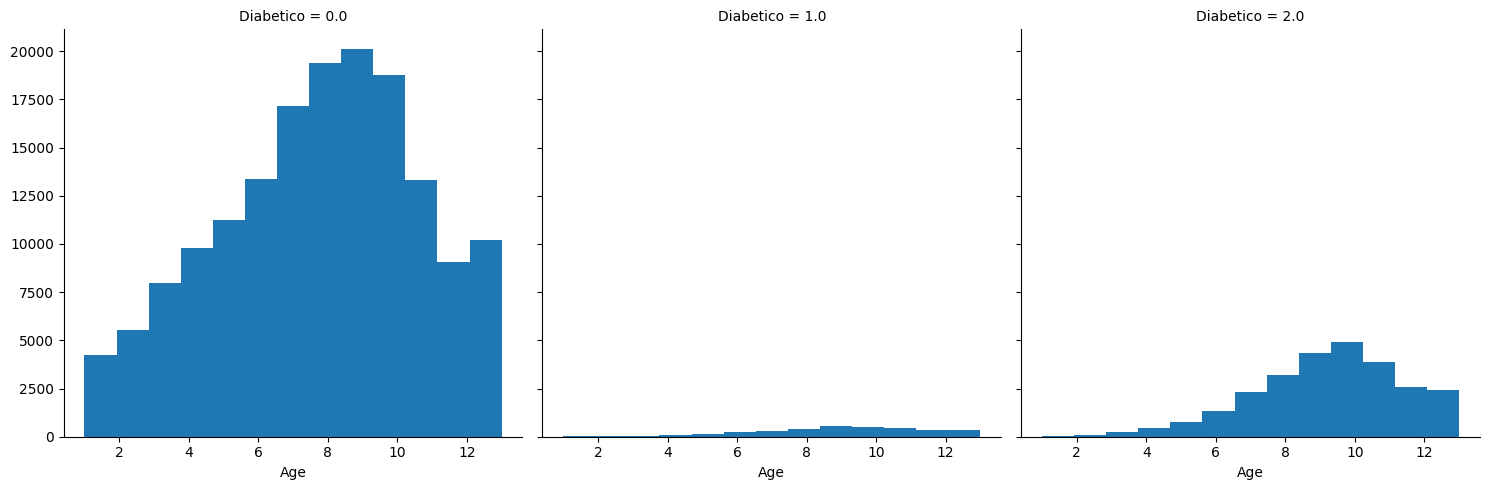

In [13]:
g = sns.FacetGrid(trainTest, col='Diabetico', height = 5)
g.map(plt.hist, 'Age', bins=13)

In [14]:
trainTest[['Fumatore', 'Diabetico']].groupby(['Fumatore'], as_index=False).mean().sort_values(by='Diabetico', ascending=False)

,Fumatore,Diabetico
1,1.0,0.347488
0,0.0,0.258929


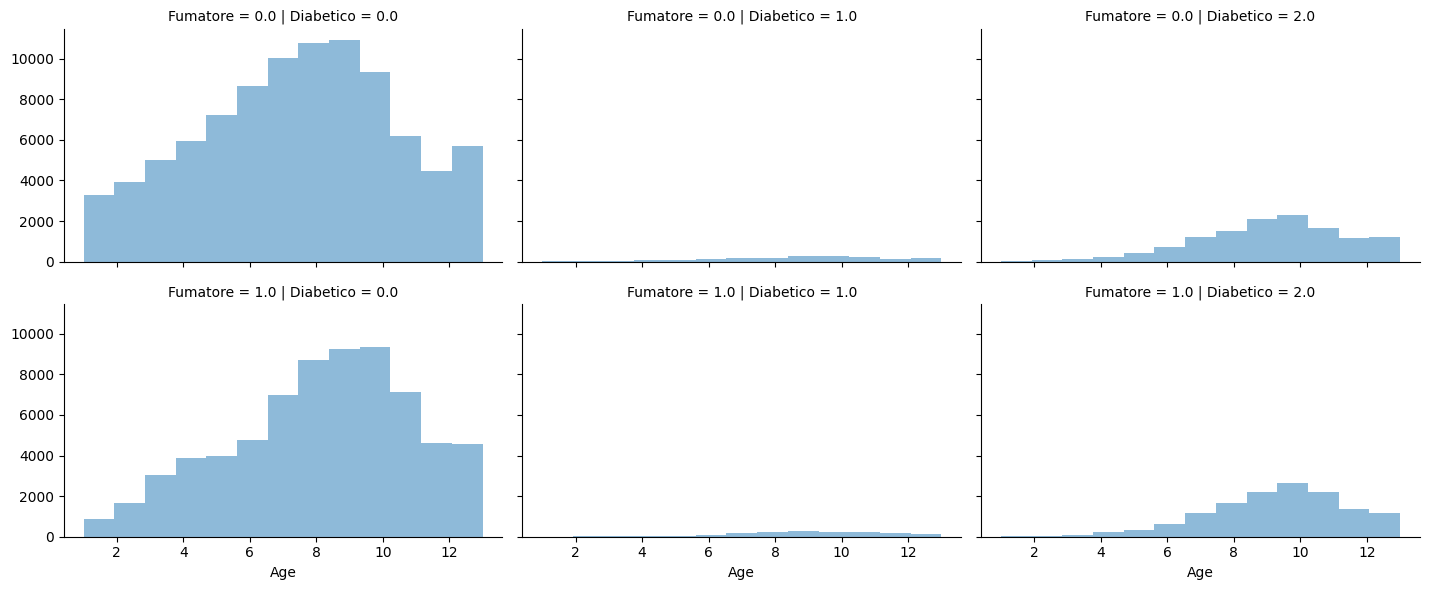

In [17]:
grid = sns.FacetGrid(trainTest, col='Diabetico', row='Fumatore',  aspect=1.6) #size=2.2,
grid.map(plt.hist, 'Age', alpha=.5, bins=13)
grid.add_legend();

/Users/alessandro/.pyenv/versions/3.10.4/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/alessandro/.pyenv/versions/3.10.4/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


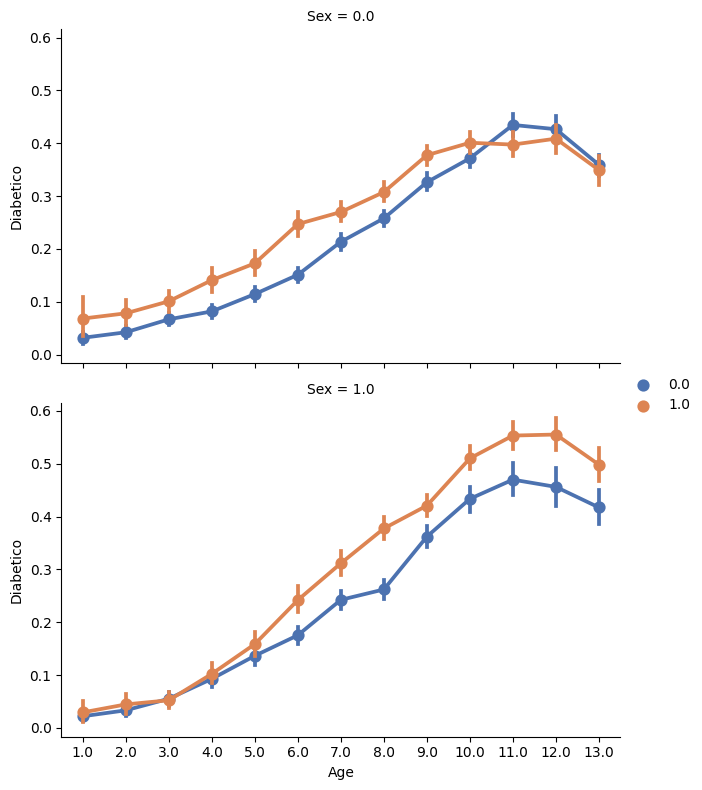

In [16]:
grid = sns.FacetGrid(trainTest, row='Sex', height=4, aspect=1.6)
grid.map(sns.pointplot, 'Age', 'Diabetico', 'Fumatore', palette='deep')
grid.add_legend()

In [18]:
Y_test = TestSet["Diabetico"]
Y_train = trainTest["Diabetico"]
X_train = trainTest.drop("Diabetico", axis=1)
X_test  = TestSet.drop(["Diabetico"], axis=1,errors='ignore').copy()
X_train.shape, Y_train.shape, X_test.shape

((190260, 21), (190260,), (63420, 21))

In [19]:
regressioneL = LogisticRegression()
regressioneL.fit(X_train, Y_train)
Y_pred = regressioneL.predict(X_test)
accuratezzaReg = round(regressioneL.score(X_train, Y_train) * 100, 2)
accuratezzaReg = round(regressioneL.score(X_test, Y_test) * 100, 2)
accuratezzaReg

/Users/alessandro/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


84.47

In [20]:
correlazione = pd.DataFrame(trainTest.columns.delete(0))
correlazione.columns = ['Risultato']
correlazione["Correlazione"] = pd.Series(regressioneL.coef_[0])

correlazione.sort_values(by='Correlazione', ascending=False)

,Risultato,Correlazione
2,ControlloColesterolo,0.651243
11,AnyHealthcare,0.555313
10,ConsumoAlcol,0.492938
12,NoDocbcCost,0.239576
19,Education,0.108183
9,Veggies,0.093048
7,AttivitàFisica,0.068877
4,Fumatore,0.060077
20,Income,0.044973
8,Fruits,0.040178


In [24]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
accuratezzaGauss = round(gaussian.score(X_train, Y_train) * 100, 2)
accuratezzaGauss

75.59

In [25]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
accuratezzaPerceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
accuratezzaPerceptron

84.2

In [26]:
sgdClassifier = SGDClassifier()
sgdClassifier.fit(X_train, Y_train)
Y_pred = sgdClassifier.predict(X_test)
accuratezzaSGD = round(sgdClassifier.score(X_train, Y_train) * 100, 2)
accuratezzaSGD

84.19

In [21]:
DecisionTreeClass = DecisionTreeClassifier()
DecisionTreeClass.fit(X_train, Y_train)
Y_pred = DecisionTreeClass.predict(X_test)
accuratezzaDecTree = round(DecisionTreeClass.score(X_train, Y_train) * 100, 2)
accuratezzaDecTree

99.36

In [28]:
RandomForestClass = RandomForestClassifier(n_estimators=100)
RandomForestClass.fit(X_train, Y_train)
Y_pred = RandomForestClass.predict(X_test)
RandomForestClass.score(X_train, Y_train)
accuratezzaRand = round(RandomForestClass.score(X_train, Y_train) * 100, 2)
accuratezzaRand

99.36

In [29]:
modelli = pd.DataFrame({
    'Modelli': ['Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ accuratezzaReg, 
              accuratezzaRand, accuratezzaGauss, accuratezzaPerceptron, 
              accuratezzaSGD, accuratezzaDecTree]})
modelli.sort_values(by='Score', ascending=False)

,Modelli,Score
5,Decision Tree,99.37
1,Random Forest,99.36
0,Logistic Regression,84.56
3,Perceptron,84.20
4,Stochastic Gradient Decent,84.19
2,Naive Bayes,75.59


In [30]:
from joblib import dump, load
dump(accuratezzaReg, 'accuratezzaReg.joblib')

['accuratezzaReg.joblib']

In [31]:

from joblib import dump, load
dump(accuratezzaGauss, 'accuratezzaGauss.joblib')

['accuratezzaGauss.joblib']

In [32]:
from joblib import dump, load
dump(accuratezzaPerceptron, 'accuratezzaPerceptron.joblib') 

['accuratezzaPerceptron.joblib']

In [33]:
from joblib import dump, load
dump(accuratezzaSGD, 'accuratezzaSGD.joblib')

['accuratezzaSGD.joblib']

In [30]:
from joblib import dump, load
dump(DecisionTreeClass, 'DecTree.joblib')

['DecTree.joblib']

In [35]:

from joblib import dump, load
dump(accuratezzaRand, 'accuratezzaRand.joblib')

['accuratezzaRand.joblib']

In [54]:
from joblib import dump, load
sds = load('DecTree.joblib')

        Iperteso  Colesterolo  ControlloColesterolo   BMI  Fumatore  Infarto   
11387        0.0          0.0                   1.0  26.0       1.0      0.0  \
16918        0.0          0.0                   1.0  21.0       0.0      0.0   
201274       1.0          1.0                   1.0  35.0       1.0      1.0   
101867       0.0          1.0                   1.0  25.0       1.0      0.0   
145843       0.0          0.0                   1.0  22.0       1.0      0.0   
103782       1.0          0.0                   1.0  38.0       1.0      0.0   

        ProblemiCardiaci  AttivitàFisica  Fruits  Veggies  ...  AnyHealthcare   
11387                0.0             1.0     0.0      1.0  ...            1.0  \
16918                0.0             1.0     1.0      1.0  ...            1.0   
201274               0.0             0.0     0.0      0.0  ...            0.0   
101867               0.0             1.0     1.0      1.0  ...            1.0   
145843               0.0          

In [ ]:
def getDataFromBot(datas):
    dati = datas
    df = pd.DataFrame({
    'Iperteso':[datas[0]],
    'Colesterolo':datas[1],
    'ControlloColesterolo':datas[2],
    'BMI':datas[3],
    'Fumatore':datas[4],
    'Infarto':datas[5],
    'ProblemiCardiaci':datas[6],
    'AttivitàFisica':datas[7],
    'Fruits':datas[8],
    'Veggies':datas[9],
    'ConsumoAlcol':datas[10],
    'AnyHealthcare':datas[11],
    'NoDocbcCost':datas[12],
    'SaluteGenerale':datas[13],
    'SaluteMentale':datas[14],
    'SaluteFisica':datas[15],
    'DifficolàSportiva':datas[16],
    'Sex':datas[17],
    'Age':datas[18],
    'Education':datas[19],
    'Income':datas[20]
})
    return df


    

In [6]:
from joblib import dump, load
sds = load('DecTree.joblib')
df = pd.DataFrame({
    'Iperteso':[1.0],
    'Colesterolo':1.0,
    'ControlloColesterolo':1.0,
    'BMI':27.0,
    'Fumatore':1.0,
    'Infarto':0.0,
    'ProblemiCardiaci':0.0,
    'AttivitàFisica':1.0,
    'Fruits':0.0,
    'Veggies':1.0,
    'ConsumoAlcol':0.0,
    'AnyHealthcare':1.0,
    'NoDocbcCost':1.0,
    'SaluteGenerale':3.0,
    'SaluteMentale':0.0,
    'SaluteFisica':0.0,
    'DifficolàSportiva':0.0,
    'Sex':1.0,
    'Age':10.0,
    'Education':4.0,
    'Income':5.0
})

print(df)  
print(type(df))
pre = sds.predict(df)
print(pre)

   Iperteso  Colesterolo  ControlloColesterolo   BMI  Fumatore  Infarto   
0       1.0          1.0                   1.0  27.0       1.0      0.0  \

   ProblemiCardiaci  AttivitàFisica  Fruits  Veggies  ...  AnyHealthcare   
0               0.0             1.0     0.0      1.0  ...            1.0  \

   NoDocbcCost  SaluteGenerale  SaluteMentale  SaluteFisica   
0          1.0             3.0            0.0           0.0  \

   DifficolàSportiva  Sex   Age  Education  Income  
0                0.0  1.0  10.0        4.0     5.0  

[1 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
[2.]
